# Content

* **age**: usia penerima manfaat utama
* **sex**: jenis kelamin kontraktor asuransi, perempuan, laki-laki
* **bmi**: Indeks massa tubuh, memberikan pemahaman tentang tubuh, bobot yang relatif tinggi atau rendah relatif terhadap tinggi,
indeks objektif berat badan (kg / m^ 2) menggunakan rasio tinggi terhadap berat, idealnya 18,5 hingga 24,9
* **children**: Jumlah anak yang ditanggung oleh asuransi kesehatan / Jumlah tanggungan
* **smoker**: Merokok
* **region**: daerah perumahan penerima di AS, timur laut, tenggara, barat daya, barat laut.
* **charges**: Biaya medis individu ditagih oleh asuransi kesehatan

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Tahap selajutnya kita mencoba membaca file csv kita atau dataset kita, karena letak file saya berada di folder dataset maka saya membuka terlebih dahulu folder tersebut kemudian baru mengambil data `insurance.csv`

In [2]:
df = pd.read_csv('dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Di sana kita memiliki 7 kolom, dan penjelasan masing-masing kolom berada pada awal code shell. Setelah ini kita akan mencoba melihat lebih detail data kita dengan `info()` dan `describe()`, yaitu pada tahap EDA, jadi langsung ajah.

# Exploratory Data Analysis (EDA)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Kita melhat beberapa tipe data pada `info()` yang pertama ada `float`, `int`, `object`. Kita juga bisa melihat baris dari dataset kita yaitu sebesar `1338` baris, jadi itu adalah sedikit gambaran dari data kita. Kemudian kita akan melihatnya lagi dengan `describe()`

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom. 
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
* Max adalah nilai maksimum.

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dengan `isnull().sum()` kita bisa melihat apakah data kita memiliki Missing Value atau tidak, dan hasil menunjukan bahwa data kita bersih dari Missing Value. Setelah ini kita akan coba melihat beberapa visual pada dataset kita agar lebih memahami data yang kita miliki.

## Visualize Object Columns

        Count  Percent
male      676     50.5
female    662     49.5


<AxesSubplot:>

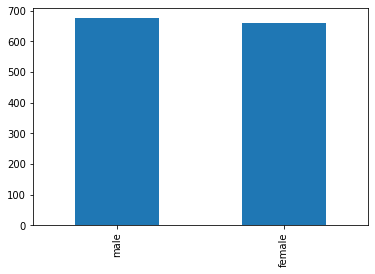

In [6]:
count = df['sex'].value_counts()
percent = 100*df['sex'].value_counts(normalize=True)
model = pd.DataFrame({'Count': count, 'Percent': percent.round(1)})
print(model)
count.plot(kind='bar')

Pertama kita melihat persentase pada data `Sex` dari keseluruhan data yang kita miliki, kita tau bahwa data `male` lebih banyak sedikit ketimbang data `female`. Akan tetapi ini bukan masalah, data akan jadi masalah jika antara kedua data tersebut memiliki perbandingan persentase yang sangat jauh.
* Male : 676
* Female : 662

           Count  Percent
southeast    364     27.2
southwest    325     24.3
northwest    325     24.3
northeast    324     24.2


<AxesSubplot:>

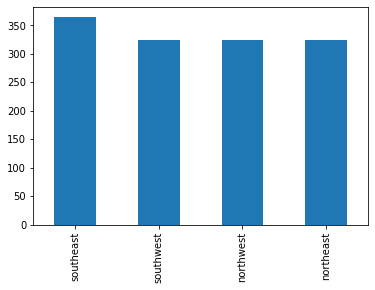

In [7]:
count = df['region'].value_counts()
percent = 100*df['region'].value_counts(normalize=True)
model = pd.DataFrame({'Count': count, 'Percent': percent.round(1)})
print(model)
count.plot(kind='bar')

Pada data wilayah pun sama, memiliki nilai yang hampir sama diantara yang lain. Akan tetapi pada data `southeast` memiliki data yang paling banyak, diantara ke tiganya. Regioin merupakan data wilayah di AS.

     Count  Percent
no    1064     79.5
yes    274     20.5


<AxesSubplot:>

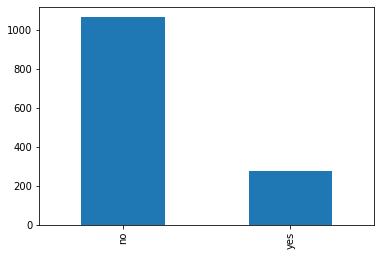

In [8]:
count = df['smoker'].value_counts()
percent = 100*df['smoker'].value_counts(normalize=True)
model = pd.DataFrame({'Count': count, 'Percent': percent.round(1)})
print(model)
count.plot(kind='bar')

Akan tetapi pada data smoker terlihat perbandingan yang sangat jauh, data `no` memiliki data yang sangat banyak ketimbang data `yes` akan tetapi sementara kita biarkan dulu seperti itu.

## Outliers

Selanjutnya kita akan melihat apakah data kita memiliki Outlier di dalamnya. Outlier adalah nilai yang berbeda sangat jauh dari pada nilai data yang lain nya. Adanya outlier akan sangat berpengaruh pada proses modeling. Oleh karena itu kita akan mencoba mengecek atribut kita apakah memiliki outlier atau tidak.

<AxesSubplot:xlabel='age'>

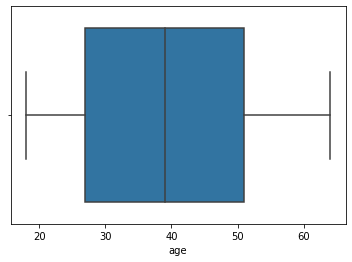

In [9]:
# age
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='bmi'>

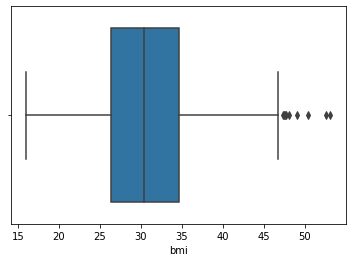

In [10]:
# bmi
sns.boxplot(x=df['bmi'])

<AxesSubplot:xlabel='children'>

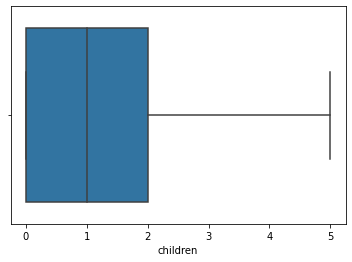

In [11]:
# children
sns.boxplot(x=df['children'])

Setelah melakukan pengecekan ternyata data tidak begitu terlihat dengan jelas, apakah data tersebut mengandung Outlier atau tidak. Namun jangan khawatir, sementara kita akan lanjut ke tahap berikutnya.

## Univariate Analysis

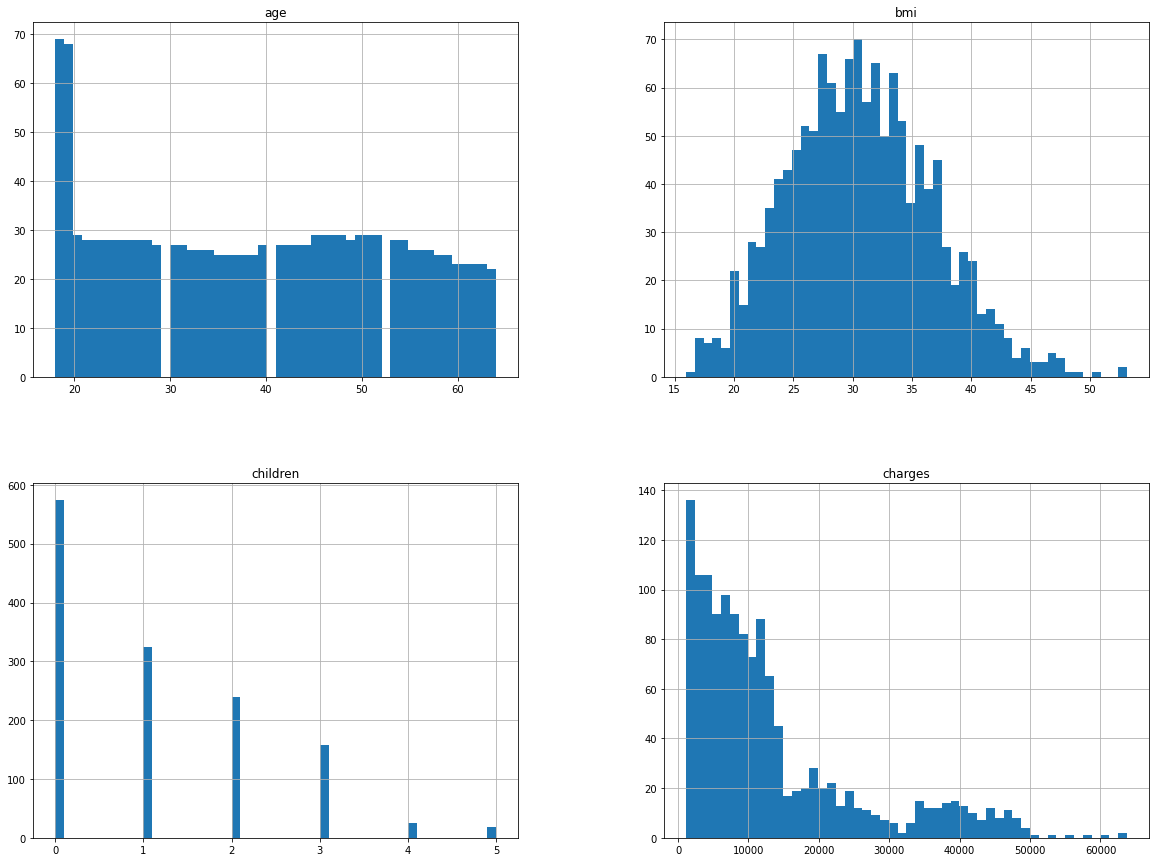

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Coba kita perhatikan data Charges atau data Target kita, nilai rata-rata di sana kisaran angka 0-15000. Rata-rata cost pasien pada kisaran tersebut, dengan rata-rata umur yang seimbang namun data dengan pasien umur di bawah 20 tahun memiliki lebih banyak dari yang lain. Dan rata-rata berat badan kisaran 25-35. Mungkin itu yang bisa kita dapatkan dari data di atas.

## Multivariate Analysis

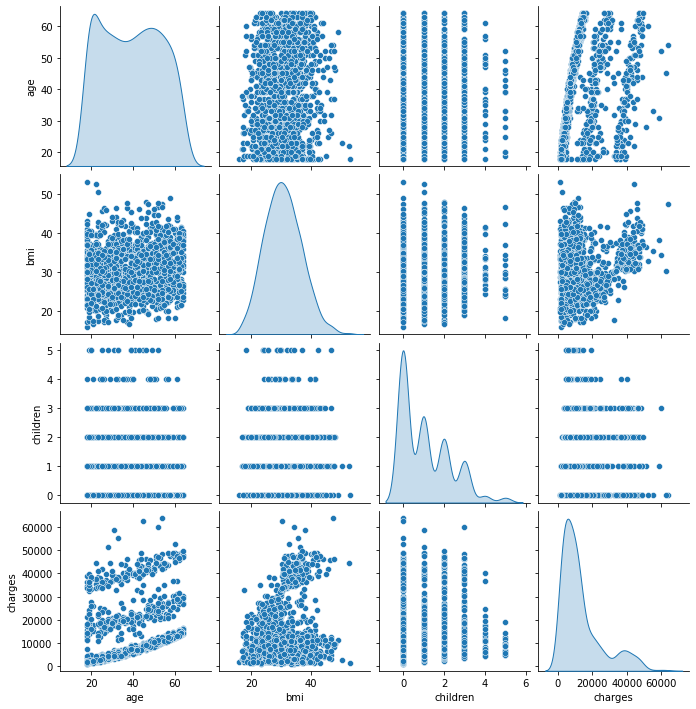

In [13]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

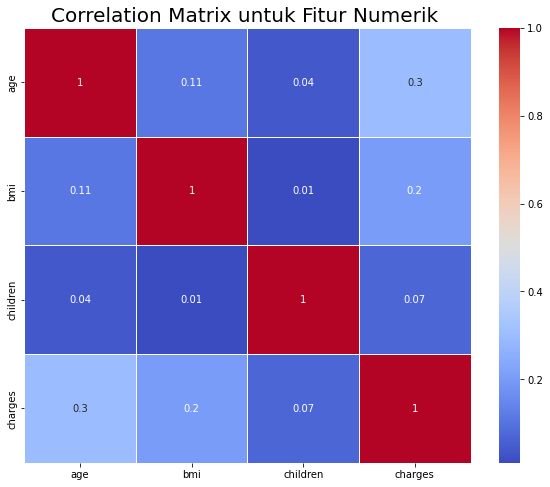

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Data di atas adalah untuk melihat Korelasi antar kolom, kalau di lihat data tidak memiliki hubungan yang begitu kuat antar kolom. Dan paling kuat ada paada `Chilldern` dan `bmi` yang memiliki sekitar `0.01` Akan tetapi Korelasi demikian masih di bilang kurang.

# Data Preparation

Tahap ini adalah tahap persiapan sebelum melakukan Modeling, dari pemisahan data, Standarisasi, dan convert data categorical menjadi numerical. Namun sebelum itu saya akan melakukan perubahan sedikit pada dataset kita agar terlihat bagus, jadi saya ingin data yang bertipe float hanya memiliki nilai 2 angka setelah titik. Kalau kita lihat ke atas lagi data `bmi` dan `charges` memiliki angka yang sangat banyak setelah titik, jadi kita akan mengatasi itu.

In [15]:
df["bmi"] = df["bmi"].round(2)
df["charges"] = df["charges"].round(2)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


Lihat data di atas, sekarang pada kolom tersebut hanya memiliki 2 angka setelah titik, agar data terlihat lebih konsisten ketimbang data memiliki angka random di belakang titik. Maksudnya, terkadang 4, 3, 5. Namun dengan kita set hanya 2, data kita sedikit terlihat lebih baik.

## Convert Categorical Into Numerical
Perhatikan kolom `sex`, `smoker`, `region`, ketiganya adala data **Categorical** atau **String/Object** Bebas kalian sebutnya apa. Namun yang perlu kita ingat adalah, data semacam itu tidak bisa diolah oleh mesin. Karena mesin hanya bisa mengolah data **Numeric** oleh sebab itu kita harus meng-convertnya menjadi data Numeric, dengan `pd.get_dummies` kita bisa memisahkan nya dengan sangat mudah. Jadi langsung ajah.

In [16]:
df = pd.get_dummies(df, drop_first=True)
df.shape
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,0,1,0,0,1
1,18,33.77,1,1725.55,1,0,0,1,0
2,28,33.00,3,4449.46,1,0,0,1,0
3,33,22.70,0,21984.47,1,0,1,0,0
4,32,28.88,0,3866.86,1,0,1,0,0


Kalian bisa lihat data Text sekarang menjadi Numeric `1` dan `0` dan di buat masing-masing kolomnya. Dan kegunaan dari `drop_first` adalah untuk menghindari `Dummy Trap` yang akan sangat mempengaruhi pada hasil kinerja model.

## Standarisasi with StandardScaler
StandardScaler adalah bahwa ia akan mengubah data kita sedemikian rupa sehingga distribusinya akan memiliki nilai rata-rata `0` dan standar deviasi `1` . Mengingat distribusi data, setiap nilai dalam dataset akan memiliki nilai rata-rata sampel dikurangi, dan kemudian dibagi dengan standar deviasi dari seluruh dataset. Kalau pusing mari kita lihat, dengan begitu kalian bisa membuat kesimpulan sendiri.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453366,-0.908614,0.298583,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509612,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383293,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.306431,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292597,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


Bagaimana? Ada bayangan? Jadi data kita di ubah agar memiliki rentang atara `1` sampai `-1`. Mungkin kalian bisa membuat kesimpulan sendiri.

## Split Data Into Training and Testing set
pada tahap ini kita akan memisahkan data kita menjadi data latih dan data uji, jadi langsung ajah.

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(["charges"],axis =1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 128)

In [19]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1338
Total # of sample in train dataset: 1204
Total # of sample in test dataset: 134


# Modeling

Sekarang waktunya kita melatih data kita, di sini saya hanya menggunakan 2 Algoritma yaitu `Random Forest Regressor` dan `XGBoost`, kedua algoritma tersebut merupakan favorit saya. Jadi saya akan menggunakan keduanya, kalian bisa eksperimen dengan algoritma lain.

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=200, max_depth=4, max_features='auto', criterion='squared_error', random_state=128)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=200, random_state=128)

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_preds = rfr.predict(X_test)
print('R2_Score:', r2_score(y_test, y_preds))
print('MAE:', mean_absolute_error(y_test, y_preds))
print('MSE:', mean_squared_error(y_test, y_preds))

R2_Score: 0.9392589648050595
MAE: 0.1780698541896388
MSE: 0.07356681058781672


## XGBoost

In [22]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgbr = XGBRegressor(booster='gbtree', gamma=2, max_depth=3, eta=0.2, n_estimators=500)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.2,
             eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [23]:
y_preds2 = xgbr.predict(X_test)
print('R2_Score:', r2_score(y_test, y_preds2))
print('MAE:', mean_absolute_error(y_test, y_preds2))
print('MSE:', mean_squared_error(y_test, y_preds2))

R2_Score: 0.9368960245237034
MAE: 0.1858795652339723
MSE: 0.07642869760622127


Dari hasil di atas kita bisa mengetahui bahwa kedua Algoritma memiliki nilai yang hampir serupa, sama-sama memiliki akurasi `93%` Akan tetapi `Random Forest` sedikit lebih unggul ketimbang `XGBoost`. Oleh karena itu kita akan menggunakan `Random Forest` sebagai model kita.

# k-Fold Cross Validation

Salah satu cara mengevaluasi model yang banyak dilakukan dan terbilang efektif yaitu K-Fold Cross Validation. Secara sederhana dapat diartikan dengan sebuah prosedur memisahkan antara data training dan data testing.

Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi. Model atau algoritma dilatih oleh subset pembelajaran dan divalidasi oleh subset validasi. Selanjutnya pemilihan jenis CV dapat didasarkan pada ukuran dataset. Biasanya CV K-fold digunakan karena dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi.

## Random Forest

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfr, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.46 %
Standard Deviation: 2.75 %


## XGBoost

In [25]:
accuracies = cross_val_score(estimator = xgbr, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.85 %
Standard Deviation: 2.14 %


# Save Model

In [26]:
import pickle

filename = 'MCRegression.h5'
pickle.dump(rfr, open(filename, 'wb'))

# Load Model

In [27]:
from sklearn.metrics import r2_score
loaded_model = pickle.load(open(filename, 'rb'))

y_preds_load = loaded_model.predict(X_test)
result = r2_score(y_test, y_preds_load)
print('Accuracy: {:.2f} %'.format(result*100))

Accuracy: 93.93 %
